# **Gender Prediction**

I have tried my best to explain the code very clearly. In this notebook, I will be using 4 classification models- Logistic Regression, K Nearest Neighbours, Random Forests and Support Vector Machines (SVM).Here gender of a person is classified based on analysing certain features.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


# 1.Exploratory Data Analysis

**1.1 Understanding the data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Loading the dataset into pandas dataframe


df=pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')

In [4]:
#Displaying the dataset

df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [5]:
# Column names

df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [6]:
# concise summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [7]:
# Descriptive statistics of the dataset

df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Check the number of examples belonging to each class.

df['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

# 1.2. Data Visualisation

<Axes: xlabel='gender', ylabel='count'>

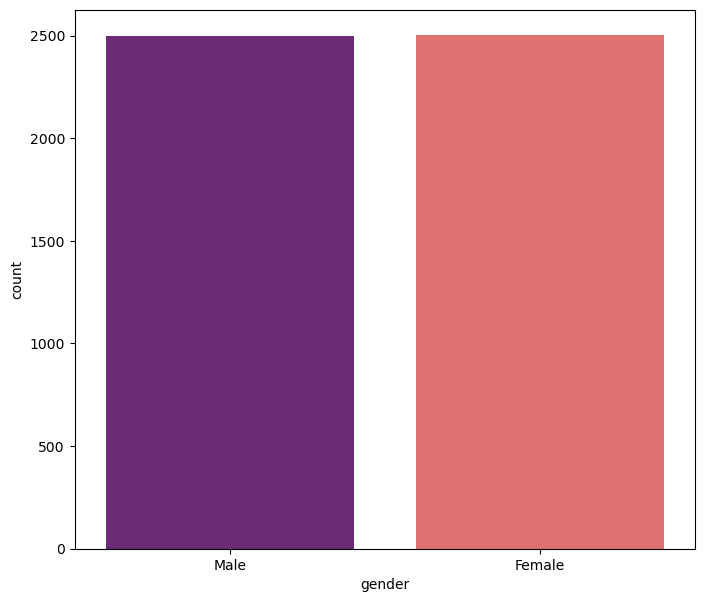

In [9]:
# countplot

plt.figure(figsize=(8,7))
sns.countplot(x='gender',data=df, palette='magma')

/tmp/ipykernel_20/3631145873.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,linewidths=0.5, cmap="Reds")


<Axes: >

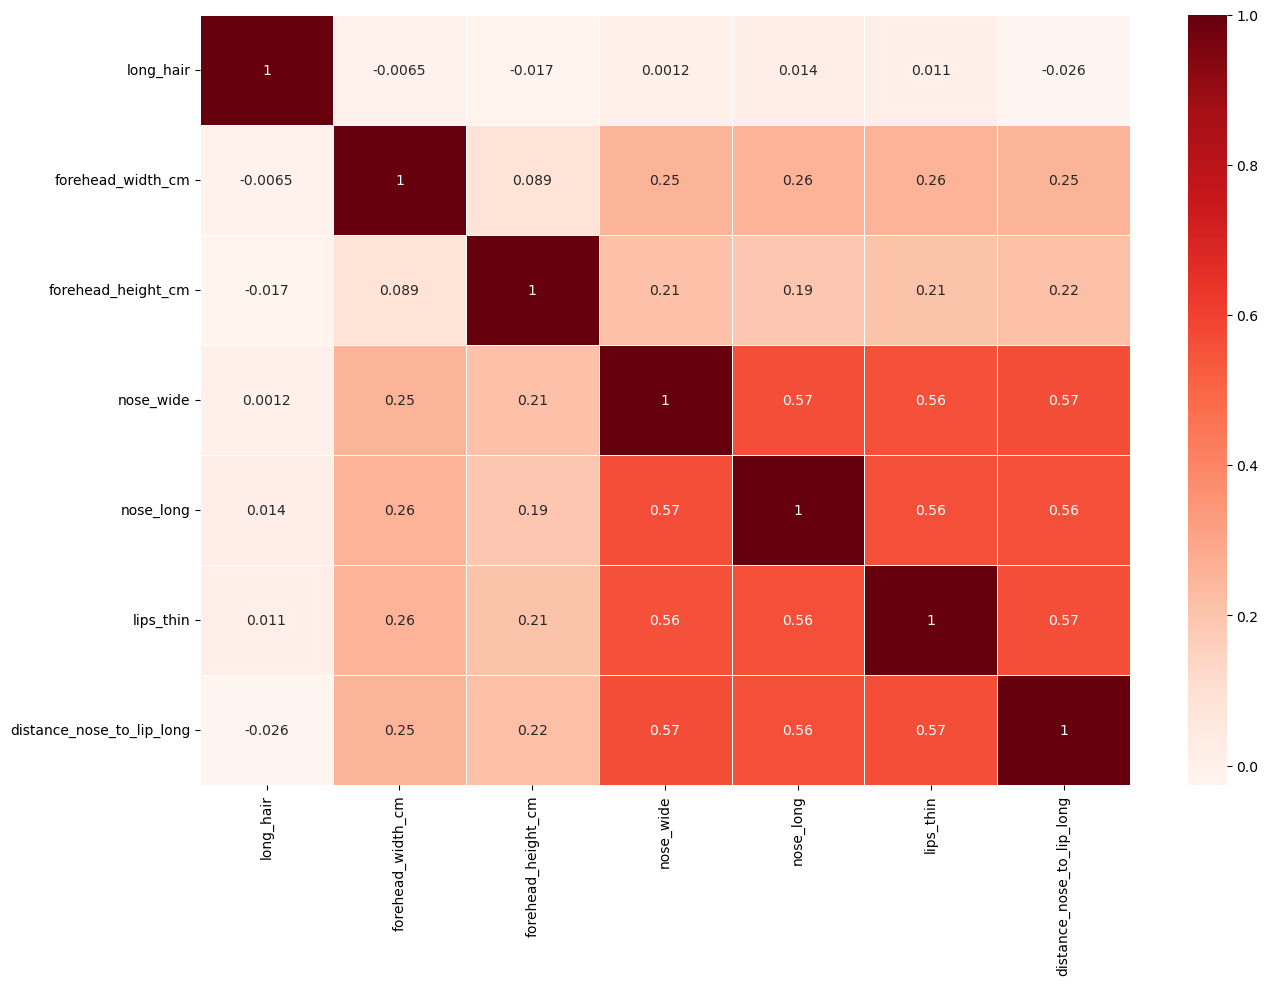

In [10]:
# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,linewidths=0.5, cmap="Reds")

In [11]:
# Getting Mean Columns with gender

m_col=['long_hair','forehead_width_cm','forehead_height_cm','nose_wide',
       'nose_long','lips_thin','distance_nose_to_lip_long','gender']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


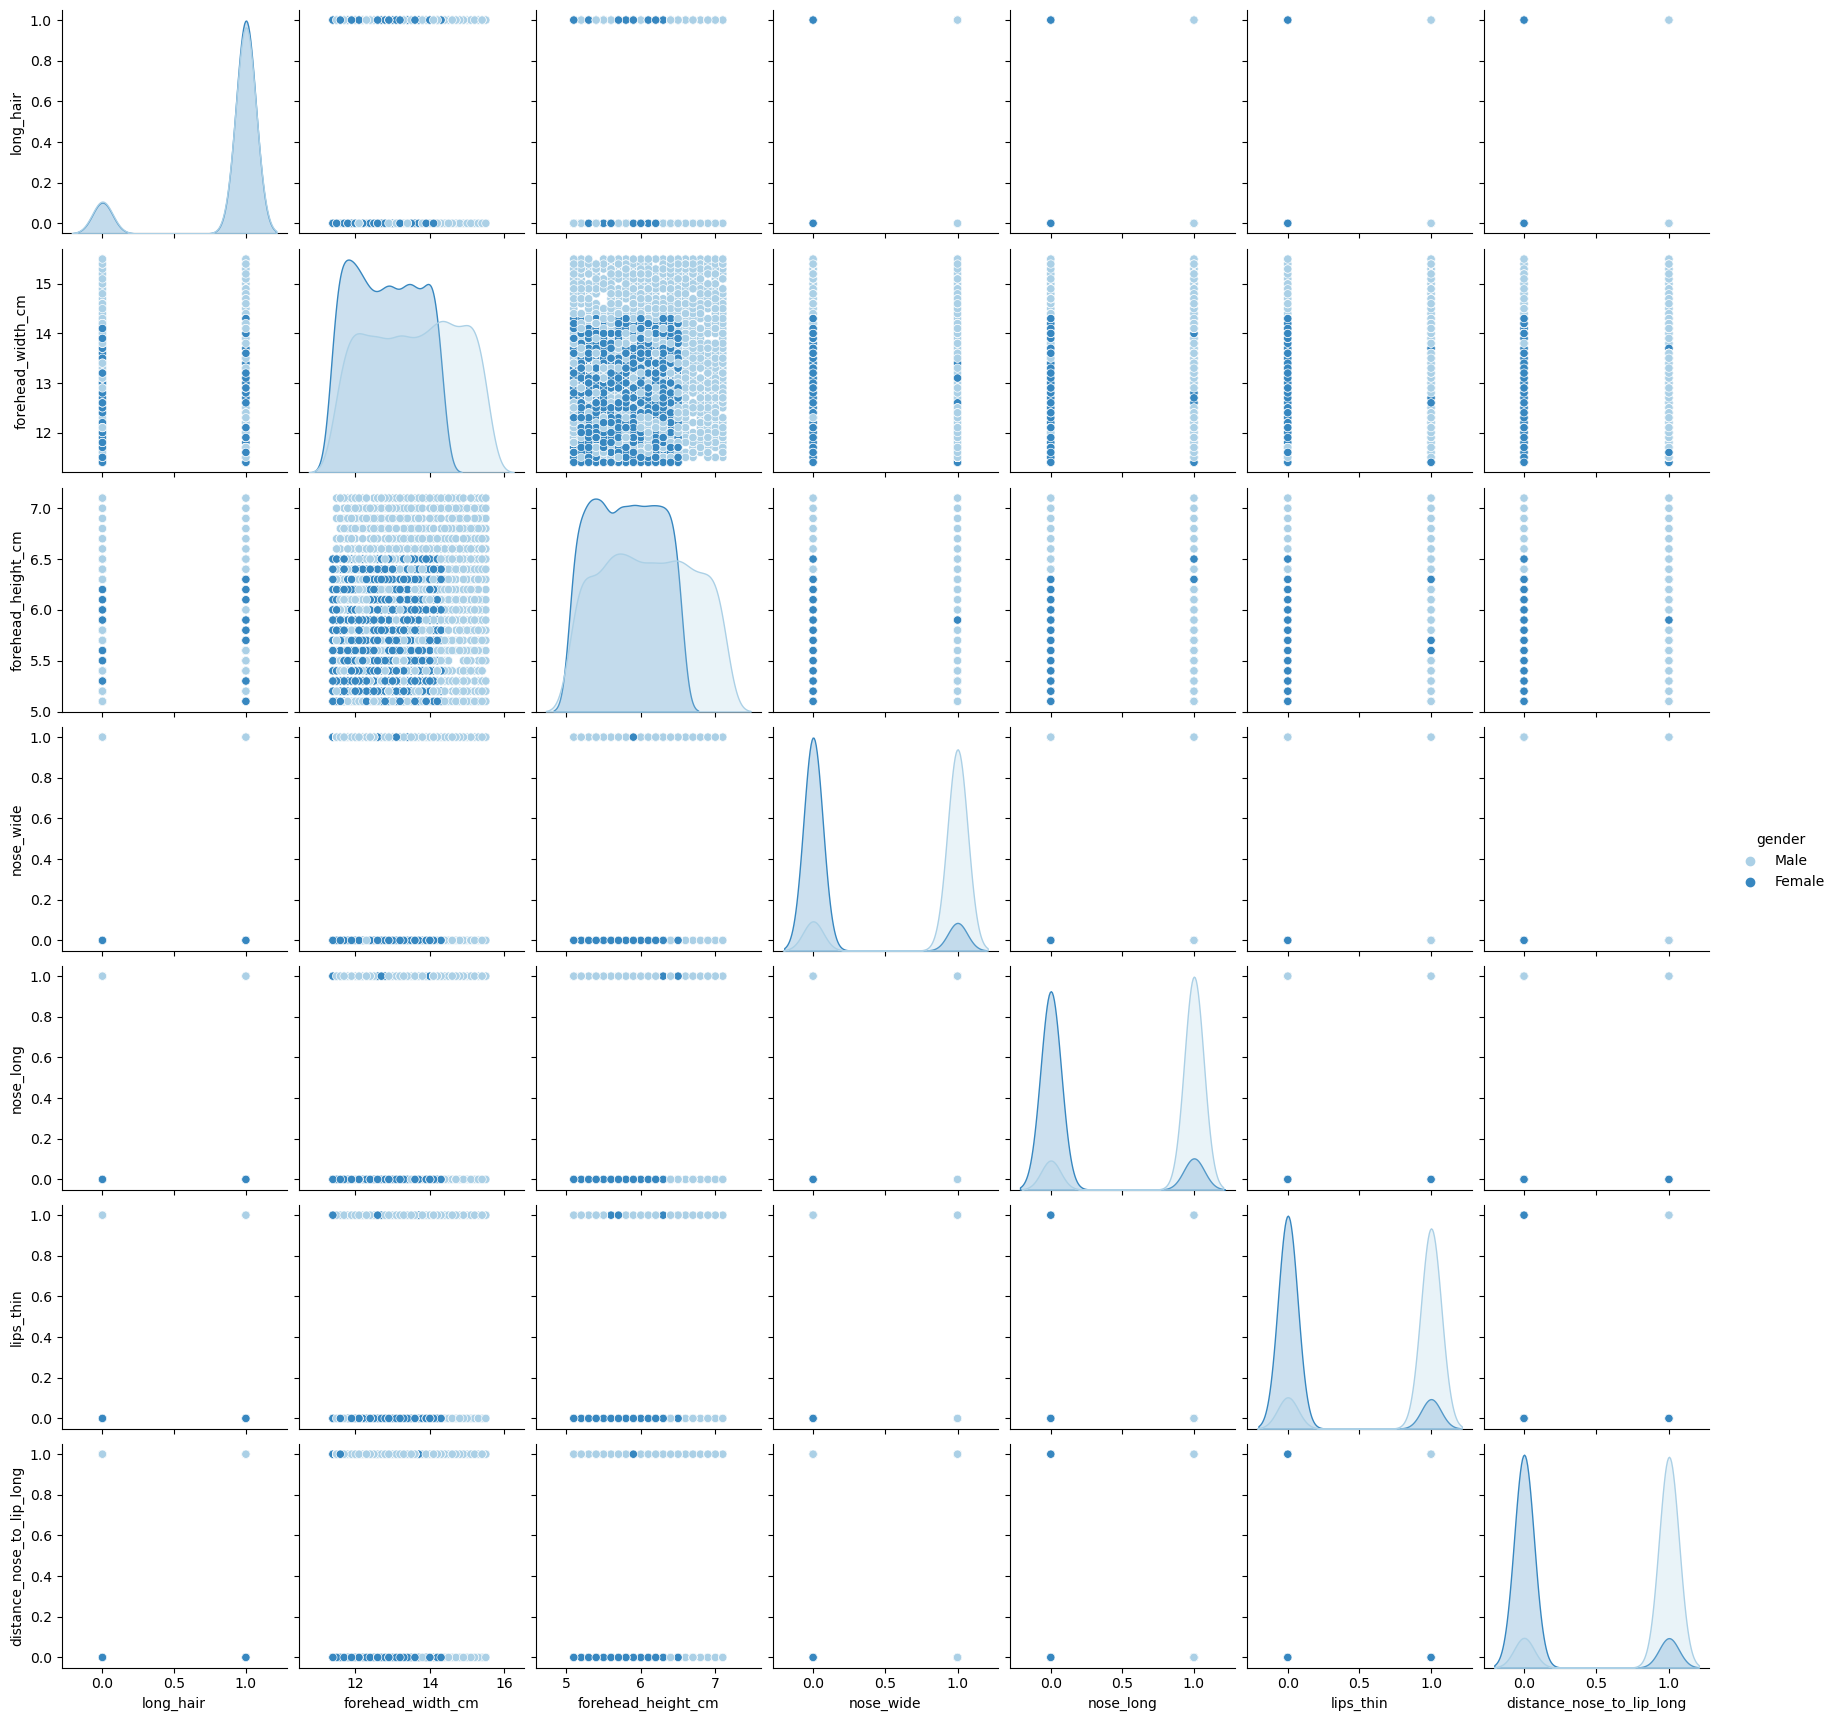

In [12]:
# Pairplot for mean columns
sns.pairplot(df[m_col],hue='gender',palette='Blues')

In [13]:
# Load the features to a variable X
# X is created by simply dropping the diagnosis column and retaining all others

X=df.drop('gender',axis=1)

# Load the target variable into Y

Y=df['gender']

In [14]:
# Displaying X

X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


In [15]:
# Displaying Y

Y

0         Male
1       Female
2         Male
3         Male
4       Female
         ...  
4996    Female
4997    Female
4998    Female
4999    Female
5000      Male
Name: gender, Length: 5001, dtype: object

# Splitting the data into test and train

In [16]:
# Splitting the dataset into test data and train data

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.40,random_state=1)

# 2.Classification Models

**2.1.Logistic Regression**

In [17]:
# Training with Logistic Regression model

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,Y_train)

LogisticRegression()

In [18]:
prediction1=lr.predict(X_train)

In [19]:
# Computing Model Accuracy of train data for Logistic regression

from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(Y_train, prediction1)
print("Accuracy score with train dataset for Logistic Regression:",lr_acc)

Accuracy score with train dataset for Logistic Regression: 0.9673333333333334


In [20]:
# Calculating Confusion matrix and Classification report for Logistic Regression

from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix: \n",confusion_matrix(Y_train,prediction1))
print('\n')
print("Classification Report: \n",classification_report(Y_train,prediction1))

Confusion Matrix: 
 [[1453   47]
 [  51 1449]]


Classification Report: 
               precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1500
        Male       0.97      0.97      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



**2.2 K Nearest Neighbors**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [22]:
prediction2 = knn.predict(X_train)

In [23]:
# Computing Model Accuracy of train data for K Neighbor Classifier

from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(Y_train, prediction2)
print("Accuracy score with train dataset for K Neighbors Classifier:",knn_acc)


Accuracy score with train dataset for K Neighbors Classifier: 0.976


In [24]:
# Calculating Confusion matrix and Classification report for K Neighbor Classifier

from sklearn.metrics import classification_report,confusion_matrix

print("Confusion matrix; \n",confusion_matrix(Y_train,prediction2))
print("\n")
print('Classification report: \n',classification_report(Y_train,prediction2))


Confusion matrix; 
 [[1476   24]
 [  48 1452]]


Classification report: 
               precision    recall  f1-score   support

      Female       0.97      0.98      0.98      1500
        Male       0.98      0.97      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



**2.3 Random Forests**

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [26]:
prediction3=rfc.predict(X_train)

In [27]:
# Computing Model Accuracy of train data for Random Forest Classifier

from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(Y_train, prediction3)

print("Accuracy score with train dataset for Random Forest Classifier:",rfc_acc)

Accuracy score with train dataset for Random Forest Classifier: 0.9986666666666667


In [28]:
# Calculating Confusion matrix and Classification report for Random Forest Classifier
 
print("Confusion matrix: \n",confusion_matrix(Y_train,prediction3))
print("\n")
print('Classification Report: \n',classification_report(Y_train,prediction3))


Confusion matrix: 
 [[1500    0]
 [   4 1496]]


Classification Report: 
               precision    recall  f1-score   support

      Female       1.00      1.00      1.00      1500
        Male       1.00      1.00      1.00      1500

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



**2.4 Support Vector Machines(SVM)**

In [29]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [30]:
prediction4=svc.predict(X_train)

In [31]:
# Computing Model Accuracy of train data for Support Vector Machines
svm_acc = accuracy_score(Y_train, prediction4)

print("Accuracy for with train dataset for Support Vector Machine:",svm_acc)

Accuracy for with train dataset for Support Vector Machine: 0.9696666666666667


In [32]:
# Calculating Confusion matrix and Classification report for Support Vector Machines
print('Confusion Matrix: \n',confusion_matrix(Y_train,prediction4))
print("\n")
print("Classification Model:",classification_report(Y_train,prediction4))


Confusion Matrix: 
 [[1459   41]
 [  50 1450]]


Classification Model:               precision    recall  f1-score   support

      Female       0.97      0.97      0.97      1500
        Male       0.97      0.97      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



# 3. Final Result

In [33]:
print(lr_acc)
print(knn_acc)
print(rfc_acc)
print(svm_acc)


0.9673333333333334
0.976
0.9986666666666667
0.9696666666666667


The accuracy of Logistic Regression Model is **96.73%**

The accuracy of KNN model is **97.6%**

The accuracy of Random Forest Model is **99.86%**

The accuracy of SVM Model is **96.96%**

<Axes: >

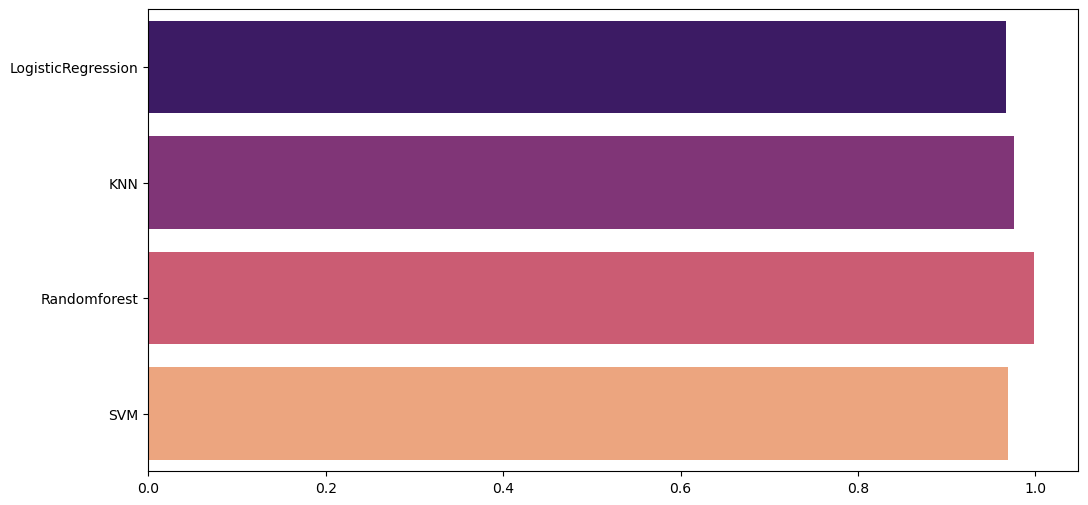

In [34]:
plt.figure(figsize=(12,6))
model_acc = [lr_acc,knn_acc,rfc_acc,svm_acc]
model_name = ['LogisticRegression','KNN','Randomforest','SVM']
sns.barplot(x=model_acc, y=model_name,palette='magma')

**Random Forest model gave best performance with an accuracy of 99.86%**

Please give your suggestions.

Upvote if you like the notebook.